In [167]:
# import necessary library
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [1]:
def load_dataframe(path=None, nrows=100000):
    if not path:
        path = '~/data_analysis/data/tappware/dnothi/employee_records.csv'
    return pd.read_csv(path, nrows=nrows)

In [3]:
df = load_dataframe()
df.shape

/tmp/ipykernel_103837/4292819960.py:4: DtypeWarning: Columns (8,17,18,23,25,34,36,39,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path, nrows=nrows)


(100000, 52)

In [168]:
# df.head()

In [8]:
df.columns

Index(['id', 'name_eng', 'name_bng', 'father_name_eng', 'father_name_bng',
       'mother_name_eng', 'mother_name_bng', 'date_of_birth', 'nid',
       'nid_valid', 'bcn', 'ppn', 'gender', 'religion', 'blood_group',
       'marital_status', 'personal_email', 'personal_mobile',
       'alternative_mobile', 'is_cadre', 'employee_grade', 'employee_cadre_id',
       'employee_batch_id', 'identity_no', 'appointment_memo_no',
       'joining_date', 'service_rank_id', 'service_grade_id',
       'service_ministry_id', 'service_office_id',
       'current_office_ministry_id', 'current_office_layer_id',
       'current_office_id', 'current_office_unit_id',
       'current_office_joining_date', 'current_office_designation_id',
       'current_office_address', 'e_sign', 'd_sign', 'image_file_name',
       'status', 'default_sign', 'hard_signature', 'soft_signature', 'cert_id',
       'cert_type', 'cert_provider', 'cert_serial', 'created_by',
       'modified_by', 'created', 'modified'],
      dtype

## Ideas
- Email ব্যবহারকারীর অনুপাত (Gmail, yahoo, ...)
- কতজন ব্যবহারকারীর ইমেইল দেওয়া হয় নাই
- কোন মাস এ Birthday বেশি
- কোন দিন এ Birthday বেশি
- Blood group অনুপাত।
- Blood group , Male Female এর মধ্যে Relationships.
- বিবাহিত ও অবিবাহিত ব্যবহারকারীর অনুপাত
- কোন Month এ জইনিং বেশি।
- ব্যবহারকারীরা কোন মোবাইল অপারেটর বেশি ব্যবহার করেন
- কতজন ব্যবহারকারী marital status গোপণ রেখেছেন। :)


funny alalysis
- character frequency in names



### Analysis on Email

Users should not use Yahoo

In [38]:
df_email = df[~df.personal_email.isnull()].copy(deep=True)
# df_email = df.personal_email
# dir(df_email.str)
df_email['email_domain'] = df_email['personal_email'].str.extract(r'@(\w+)\.')
# df_email.plot(kind='bar')


In [134]:
df_email = df[~df.personal_email.isnull()].copy(deep=True)
df_email['email_domain'] = df_email['personal_email'].str.split('@', expand=True)[1]
df_email['email_domain'] =  df_email['email_domain'].str.strip()

df_email['email_domain'] = df_email['email_domain'].map({'gmail.com': 'Gmail', 'yahoo.com': 'Yahoo'})
df_email['email_domain'] = df_email['email_domain'].fillna('Others')
df_email = df_email.groupby('email_domain').size().reset_index(name='counts')
# df_email['email_domain'] = ['email_domain'].str.lower()
# df_email.email_domain.value_counts()[:10]

In [135]:

# df_email = df_email.groupby('email_domain').size().reset_index(name='counts')
df_email

,email_domain,counts
0,Gmail,66849
1,Others,8527
2,Yahoo,13058


[None, None, None, None, None, None]

Text(0.5, 1.0, 'Email client statistics')

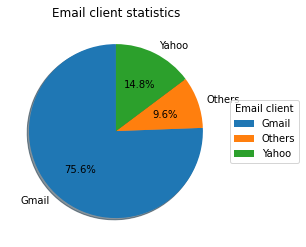

In [128]:
# creating the dataset
labels = df_email['email_domain']
values = df_email['counts']
fig1, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
_ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
_ = ax.legend(wedges, labels, title="Email client", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight=500)
ax.set_title("Email client statistics")
plt.show()



In [149]:
labels = ['Email Given', 'Email not Given']
values = [df.personal_email.notnull().sum(), df.personal_email.isnull().sum()]
lables, values
# df.personal_email.notnull().sum()

(['Email Given', 'Email not Given'], [88434, 11566])

[None, None, None, None]

Text(0.5, 1.0, 'Email client statistics')

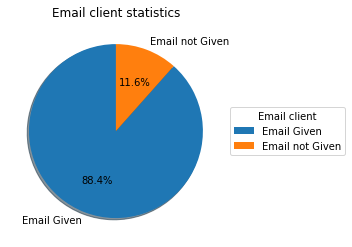

In [150]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
_ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
_ = ax.legend(wedges, labels, title="Email client", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight=500)
ax.set_title("Email client statistics")
plt.show()

### Analysis on Birthday

<Figure size 1280x800 with 0 Axes>

<BarContainer object of 31 artists>

Text(0.5, 1.0, 'Birthday')

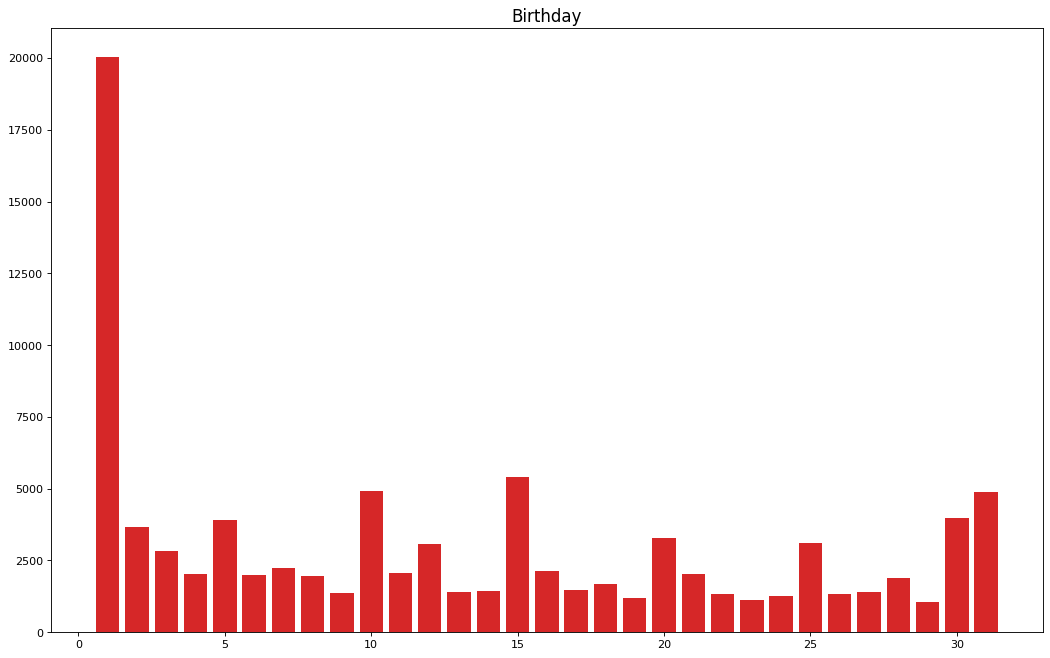

In [166]:
# df.columns
df_birthday = df[df.date_of_birth.notnull()].copy(deep=True)
df_birthday['date_of_birth'] = pd.to_datetime(df_birthday['date_of_birth'], errors='coerce')
df_birthday = df_birthday[df_birthday.date_of_birth.notnull()].copy(deep=True)

plt.figure(figsize=(16,10), dpi= 80)
df_birthday = df_birthday.groupby(df_birthday.date_of_birth.dt.day).size().reset_index(name='counts')
plt.bar('date_of_birth', 'counts', data=df_birthday, color='tab:red')
plt.title("Birthday", fontsize=15)